# Opdracht 4.3 - Geopandas

In [1]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import geopandas

### Geopandas

https://geopandas.org/docs/user_guide/mapping.html

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


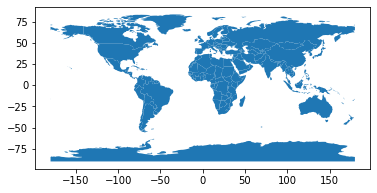

In [15]:
world.plot();

In [ ]:
world = world.loc[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

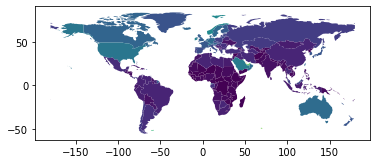

In [23]:
world.plot(column='gdp_per_cap');

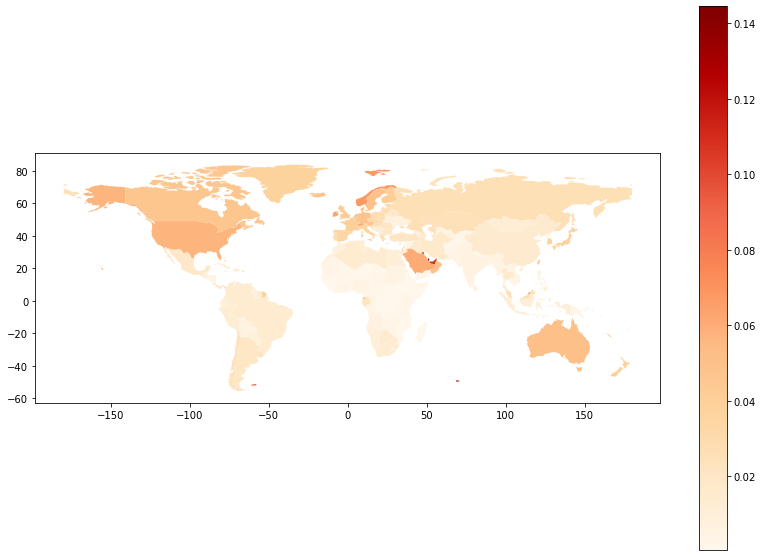

In [24]:
world.plot(column='gdp_per_cap', figsize=(14, 10), legend=True, cmap='OrRd');

### Wijk- en buurtkaart 2019
https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2019

In [3]:
directory = '../datasets/WijkBuurtkaart_2019_v2up/'
shapefile = 'gemeente_2019_v2up.shp'
try:
    nederland = geopandas.read_file(directory + shapefile)
except:
    print('Can not open shape file.')

#### of direct uit zip bestand

In [4]:
filename = '../datasets/WijkBuurtkaart_2019_v2up.zip'
shapefile = 'gemeente_2019_v2up.shp'
try:
    df = geopandas.read_file('zip://' + filename + '!' + shapefile)
except:
    print('Can not open shape file.')

In [5]:
print(nederland.shape)
nederland.head()

(438, 140)


,GM_CODE,GM_NAAM,WATER,OAD,STED,BEV_DICHTH,AANT_INW,AANT_MAN,AANT_VROUW,P_00_14_JR,...,AV20_BIOS,AF_SAUNA,AF_ZONBNK,AF_ATTRAC,AV10ATTRAC,AV20ATTRAC,AV50ATTRAC,Shape_Leng,Shape_Area,geometry
0,GM0010,Delfzijl,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,128728.007061,9.129235e+07,"MULTIPOLYGON (((268674.309 592382.331, 268667...."
1,GM0034,Almere,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,122665.358634,1.095623e+08,"MULTIPOLYGON (((150213.998 479503.726, 150087...."
2,GM0050,Zeewolde,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,83290.773617,1.633050e+07,"MULTIPOLYGON (((154927.535 474979.290, 154931...."
3,GM0060,Ameland,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,156406.894023,2.085914e+08,"POLYGON ((166000.000 609500.000, 170000.000 61..."
4,GM0072,Harlingen,JA,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,-99999999,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,104274.683036,3.618323e+08,"MULTIPOLYGON (((158392.775 580357.500, 158387...."


In [6]:
print(*list(nederland.columns), sep='\n')

GM_CODE
GM_NAAM
WATER
OAD
STED
BEV_DICHTH
AANT_INW
AANT_MAN
AANT_VROUW
P_00_14_JR
P_15_24_JR
P_25_44_JR
P_45_64_JR
P_65_EO_JR
P_ONGEHUWD
P_GEHUWD
P_GESCHEID
P_VERWEDUW
GEBOO_TOT
P_GEBOO
STERFT_TOT
P_STERFT
AANTAL_HH
P_EENP_HH
P_HH_Z_K
P_HH_M_K
GEM_HH_GR
P_WEST_AL
P_N_W_AL
P_MAROKKO
P_ANT_ARU
P_SURINAM
P_TURKIJE
P_OVER_NW
A_BED_A
A_BED_BF
A_BED_GI
A_BED_HJ
A_BED_KL
A_BED_MN
A_BED_RU
A_BEDV
WONINGEN
WOZ
P_1GEZW
P_MGEZW
P_BEWNDW
P_KOOPWON
P_HUURWON
P_HUURCORP
P_HUUROVVH
P_HUKO_ONB
P_WONT2000
P_WONV2000
P_LEEGSW
G_GAS_TOT
G_GAS_APP
G_GAS_TUS
G_GAS_HOEK
G_GAS_21K
G_GAS_VRY
G_GAS_HU
G_GAS_KO
G_ELEK_TOT
G_ELEK_APP
G_ELEK_TUS
G_ELEK_HOE
G_ELEK_21K
G_ELEK_VRY
G_ELE_HU
G_ELE_KO
AUTO_TOT
AUTO_HH
AUTO_LAND
MOTOR_2W
A_BST_B
A_BST_NB
OPP_TOT
OPP_LAND
OPP_WATER
AF_ARTSPR
AV1_ARTSPR
AV3_ARTSPR
AV5_ARTSPR
AF_ARTSPO
AF_APOTH
AF_ZIEK_I
AV5_ZIEK_I
AV10ZIEK_I
AV20ZIEK_I
AF_ZIEK_E
AV5_ZIEK_E
AV10ZIEK_E
AV20ZIEK_E
AF_SUPERM
AV1_SUPERM
AV3_SUPERM
AV5_SUPERM
AF_DAGLMD
AV1_DAGLMD
AV3_DAGLMD
AV5_DAGLMD
AF_WARENH

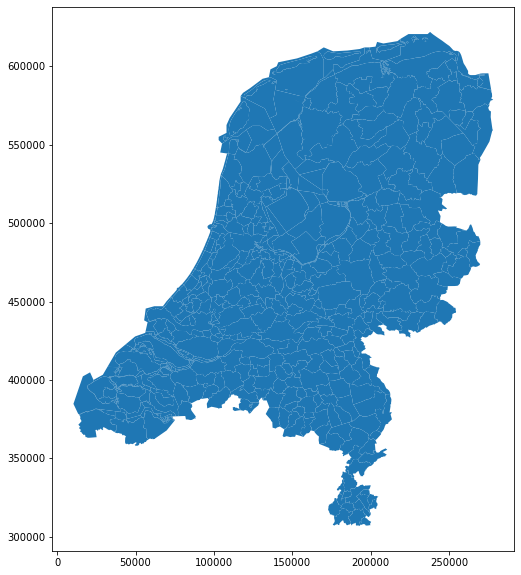

In [7]:
nederland.plot(figsize=(10, 10))
plt.show()

### Bevolkingsdichtheid per gemeente

In [8]:
nederland.sort_values('BEV_DICHTH', ascending=False)[:10]['GM_NAAM']

238             's-Gravenhage
246                    Leiden
202                   Haarlem
192                 Amsterdam
233    Capelle aan den IJssel
234                     Delft
237                     Gouda
258                  Schiedam
249                 Maassluis
257                  Rijswijk
Name: GM_NAAM, dtype: object

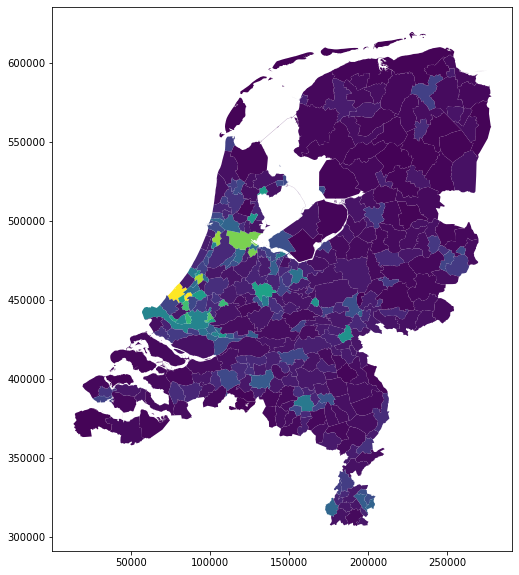

In [11]:
nederland[nederland['BEV_DICHTH']>0].plot(column='BEV_DICHTH', figsize=(10, 10));

### Verhoudin tussen mannen en vrouwen per gemeente

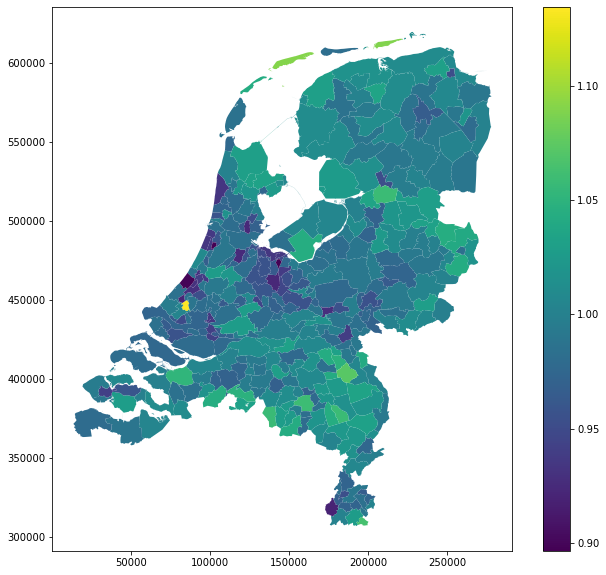

In [12]:
man_vrouw = nederland.loc[nederland['AANT_VROUW'] > 0, 
                          ['AANT_INW','AANT_MAN','AANT_VROUW', 'geometry']]

man_vrouw['MAN_VROUW'] = man_vrouw['AANT_MAN'] / man_vrouw['AANT_VROUW']

man_vrouw.plot(column='MAN_VROUW', figsize=(11, 10), legend=True);